# Problem Statement:
**Avocado is a fruit consumed by people heavily in the United States.**

## Content
**This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.**

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags**

**The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

**Some relevant columns in the dataset:**

**Date - The date of the observation**

**AveragePrice - the average price of a single avocado**

**type - conventional or organic**

**year - the year**

**Region - the city or region of the observation**

**Total Volume - Total number of avocados sold**

**4046 - Total number of avocados with PLU 4046 sold**

**4225 - Total number of avocados with PLU 4225 sold**

**4770 - Total number of avocados with PLU 4770 sold**

### Inspiration /Label :-
**The dataset can be seen in two angles to find the region and find the average price .**

**Task: One of Classification and other of Regression**

**Do both tasks in the same .ipynb file and submit at single file.**

# Importing Required Libraries

In [343]:
# importing libraries for data preprocessing
import numpy as np # linear algebra
import pandas as pd # data preprocessing and reading files to make dataframe.

# importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# importing library for EDA Analysis
from scipy.stats import zscore

# importing library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing library to split data
from sklearn.model_selection import train_test_split

# importing libraries for building models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.formula.api import ols

# importing library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

# importing library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

# importing libraries for regularisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

# making dataframe 

In [344]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [345]:
df.shape

(18249, 14)

#### We have 18249 rows and 14 columns for analysis.

#### Dependent variable column of our dataframe is :

1.AveragePrice - the average price of a single avocado

#### Indepandent features are :

1. Date - The date of the observation

2. type - conventional or organic

3. year - the year

4. Region - the city or region of the observation

5. Total Volume - Total number of avocados sold

6. 4046 - Total number of avocados with PLU 4046 sold

7. 4225 - Total number of avocados with PLU 4225 sold

8. 4770 - Total number of avocados with PLU 4770 sold

#### Here, We can see an unnecessary column "Unnamed". We need to drop it

In [346]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### We can see some of our columns in data is not of correct data type. We need to convert them to correct formate. So that it will be easier to do analysis. 

In [348]:
for i in df.columns:
    if i == 'Date':
        df[i] = df[i].astype('datetime64[ns]')
    elif df[i].dtype == 'object':
        df[i] = df[i].astype('category')

In [349]:
# lets check dtype once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  category      
 11  year          18249 non-null  int64         
 12  region        18249 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 1.6 MB


## Checking for null values 

In [350]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

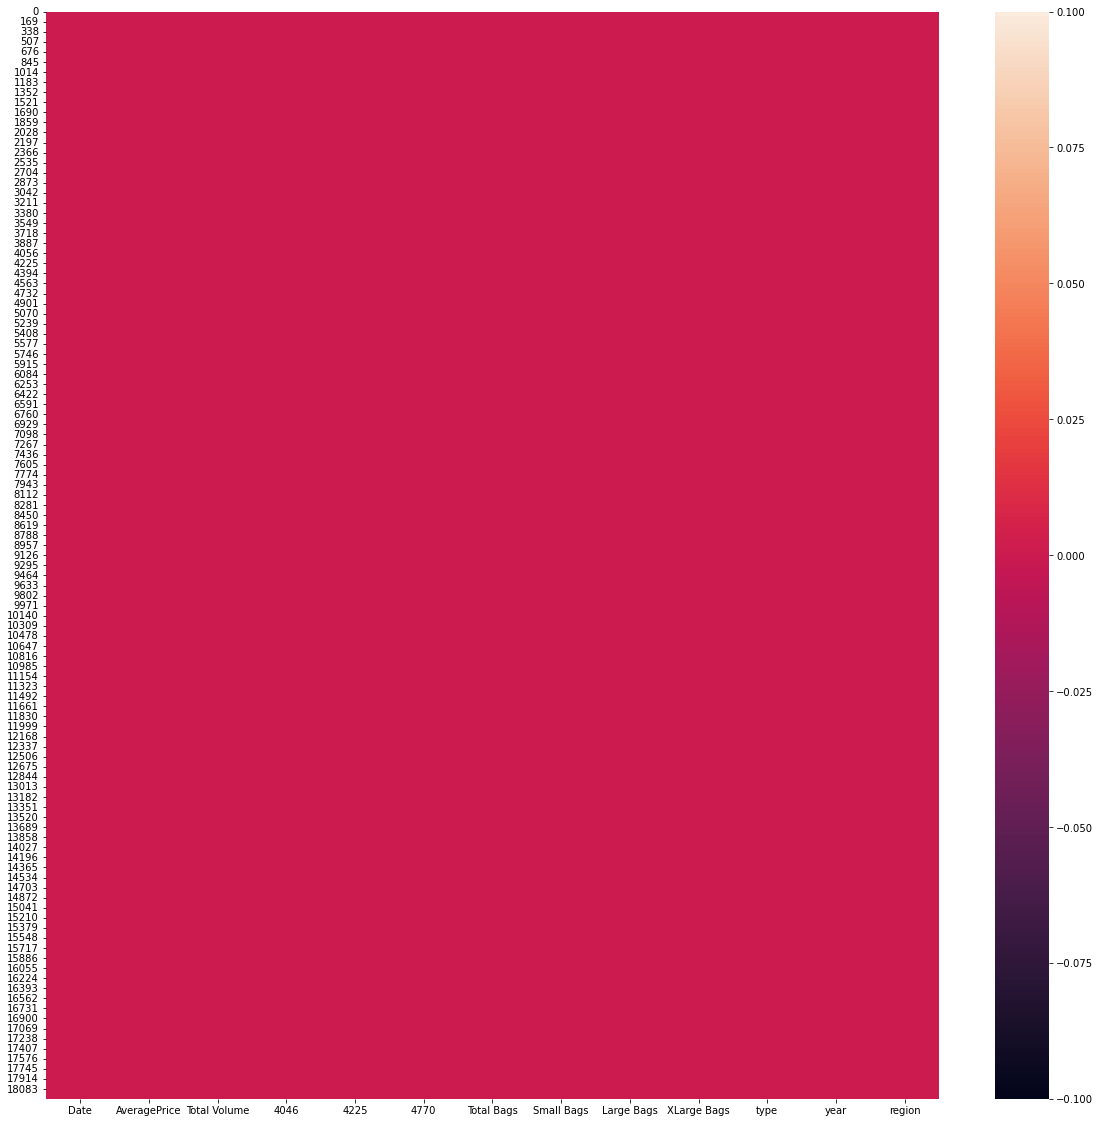

In [351]:
sns.heatmap(df.isnull())

#### We can see there are no null values 

## Checking for duplicates

In [352]:
x = df.duplicated().sum()
if x > 0:
    print('There are no duplicated entries.')
else:
    print(f'There are {x} duplicates.')

There are 0 duplicates.


In [353]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### We already have information about year of price scanning so lets add date and month columns also :

In [354]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Now along with this we can drop date column
df.drop(['Date'],axis = 1, inplace= True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### Lets check the Unique Values in each columns :

In [355]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [356]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


#### We can see there is so much difference between median and mean of many colums 
#### So, We can say that there is high possibility of Outliers in the data.

## A. Univariate analysis:

### EDA on categorical data

In [357]:
cat=df[['region','type']]
cat

,region,type
0,Albany,conventional
1,Albany,conventional
2,Albany,conventional
3,Albany,conventional
4,Albany,conventional
...,...,...
18244,WestTexNewMexico,organic
18245,WestTexNewMexico,organic
18246,WestTexNewMexico,organic
18247,WestTexNewMexico,organic


### EDA on continous data

In [358]:
num=df[{'AveragePrice', 'Total Volume', '4046', '4225', '4770'
       , 'Month', 'Day',"Total Bags","Small Bags","Large Bags","XLarge Bags"}]
num

,Total Bags,Total Volume,XLarge Bags,AveragePrice,Day,Small Bags,4770,4225,Large Bags,Month,4046
0,8696.87,64236.62,0.0,1.33,27,8603.62,48.16,54454.85,93.25,12,1036.74
1,9505.56,54876.98,0.0,1.35,20,9408.07,58.33,44638.81,97.49,12,674.28
2,8145.35,118220.22,0.0,0.93,13,8042.21,130.50,109149.67,103.14,12,794.70
3,5811.16,78992.15,0.0,1.08,6,5677.40,72.58,71976.41,133.76,12,1132.00
4,6183.95,51039.60,0.0,1.28,29,5986.26,75.78,43838.39,197.69,11,941.48
...,...,...,...,...,...,...,...,...,...,...,...
18244,13498.67,17074.83,0.0,1.63,4,13066.82,0.00,1529.20,431.85,2,2046.96
18245,9264.84,13888.04,0.0,1.71,28,8940.04,0.00,3431.50,324.80,1,1191.70
18246,9394.11,13766.76,0.0,1.87,21,9351.80,727.94,2452.79,42.31,1,1191.92
18247,10969.54,16205.22,0.0,1.93,14,10919.54,727.01,2981.04,50.00,1,1527.63


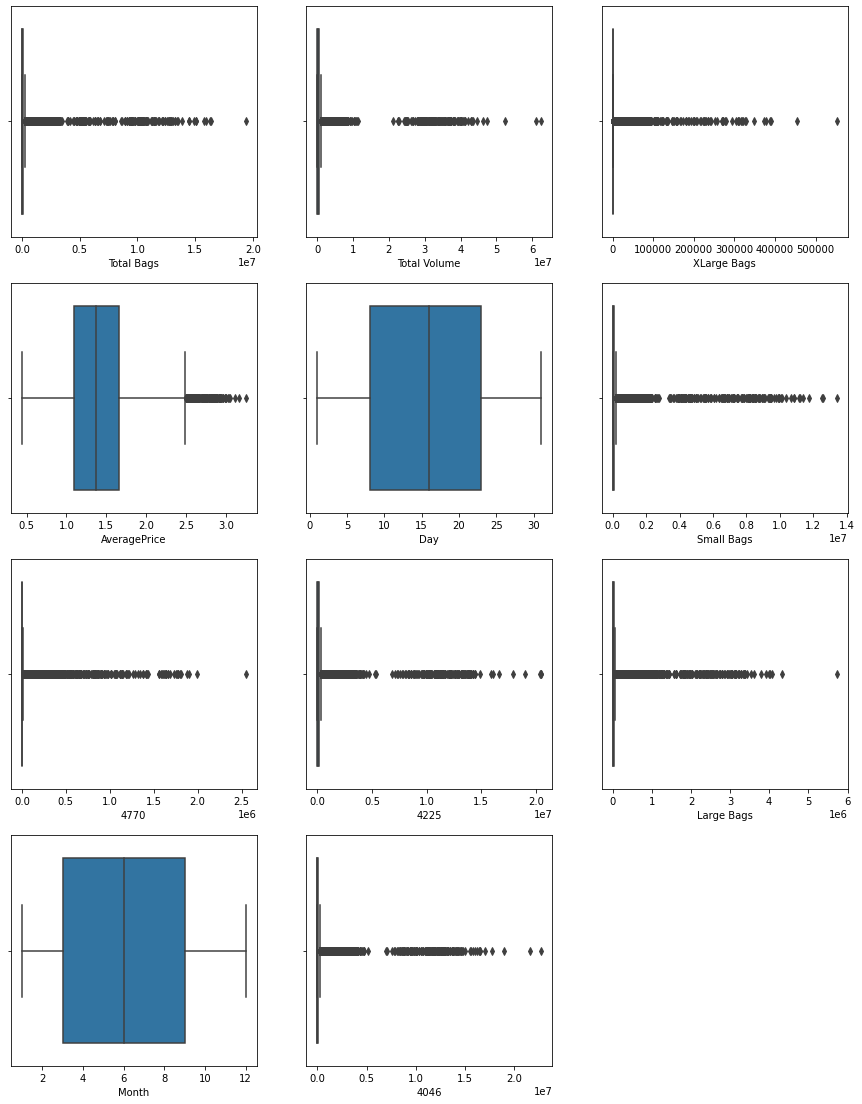

In [359]:
#plotting the numeric data

plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

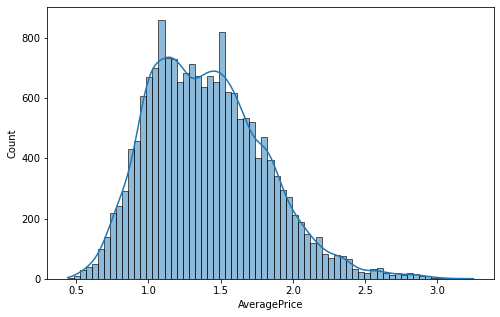

In [360]:
plt.figure(figsize=(8,5))
sns.histplot(df['AveragePrice'],kde=True)

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

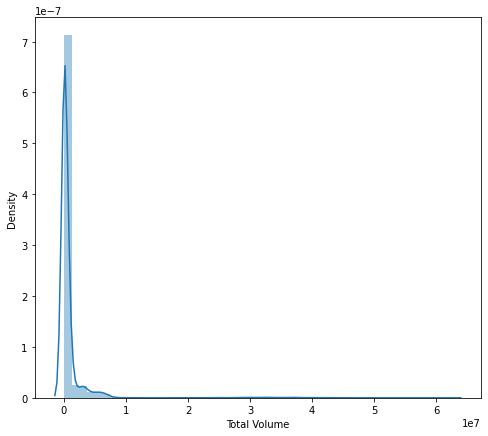

In [361]:
plt.figure(figsize=(8,7))
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

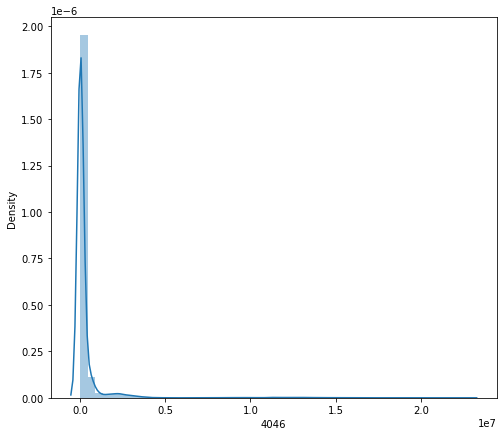

In [362]:
plt.figure(figsize=(8,7))
sns.distplot(df['4046'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

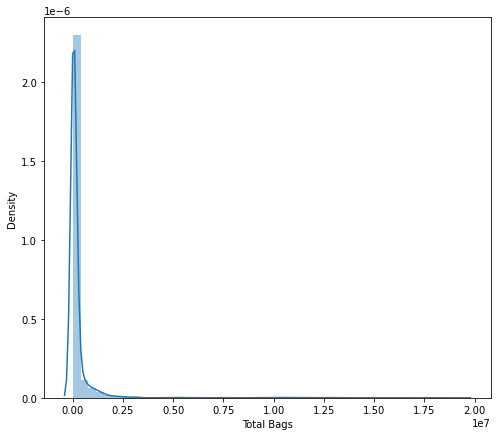

In [363]:
plt.figure(figsize=(8,7))
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='type', ylabel='count'>

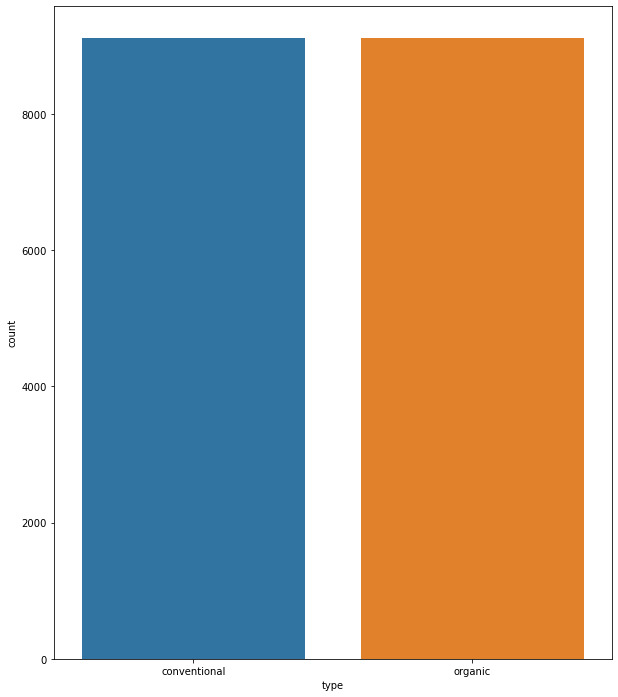

In [364]:
plt.figure(figsize=(10,12))
sns.countplot(df['type'])

In [365]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   AveragePrice  18249 non-null  float64 
 1   Total Volume  18249 non-null  float64 
 2   4046          18249 non-null  float64 
 3   4225          18249 non-null  float64 
 4   4770          18249 non-null  float64 
 5   Total Bags    18249 non-null  float64 
 6   Small Bags    18249 non-null  float64 
 7   Large Bags    18249 non-null  float64 
 8   XLarge Bags   18249 non-null  float64 
 9   type          18249 non-null  category
 10  year          18249 non-null  int64   
 11  region        18249 non-null  category
 12  Month         18249 non-null  int64   
 13  Day           18249 non-null  int64   
dtypes: category(2), float64(9), int64(3)
memory usage: 1.7 MB


In [367]:
df.dtypes

AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type            category
year               int64
region          category
Month              int64
Day                int64
dtype: object

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


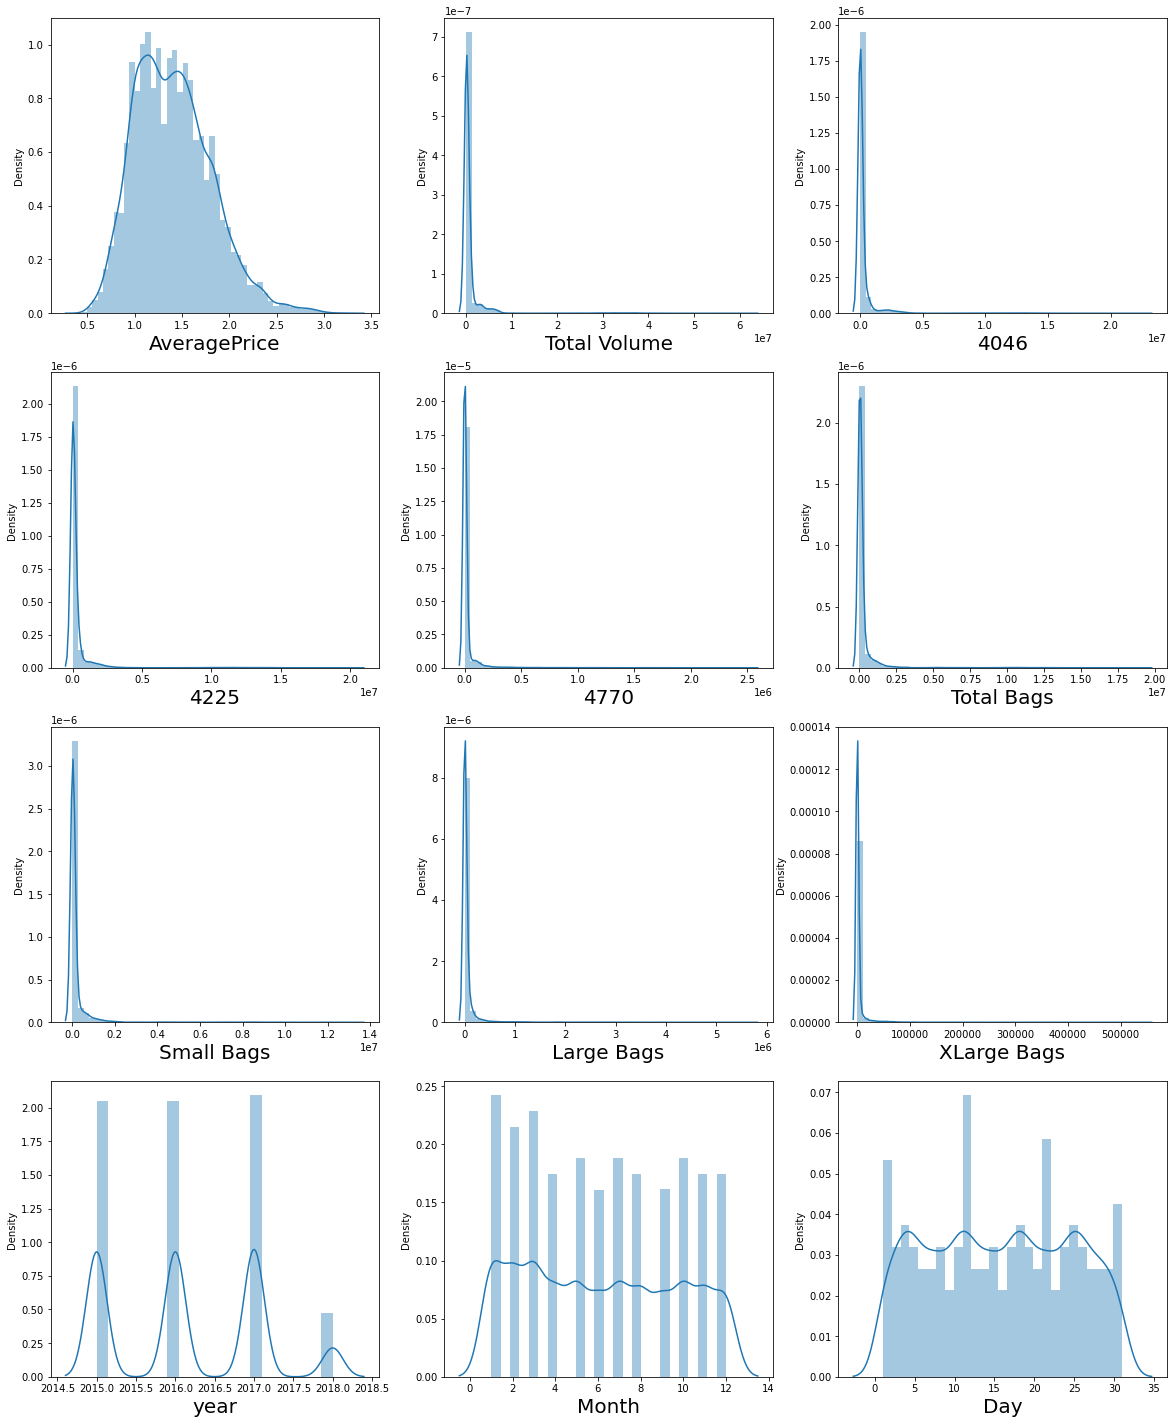

In [368]:
# Now checking for numerical columns
no_1=[]
for i in df.dtypes.index:
    if (df.dtypes[i]=='float64') or (df.dtypes[i]=='int64'):
        no_1.append(i)
print(no_1)

# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in no_1:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Following coloums have skewness and these are all left skewed : 
#### AveragePrice ,Total Volume ,4046 ,4225 ,4770 ,Total Bags ,Small Bags ,Large Bags ,XLarge Bags.
#### We can see that in year column the least sales of avocado is in 2018 and 2015,2016 & 2017 have almost same kind of sales
#### In Month jan,Feb and Mar the sale is max, and the least seems to be in august and september

## B. Bi-Variate analysis:

In [369]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

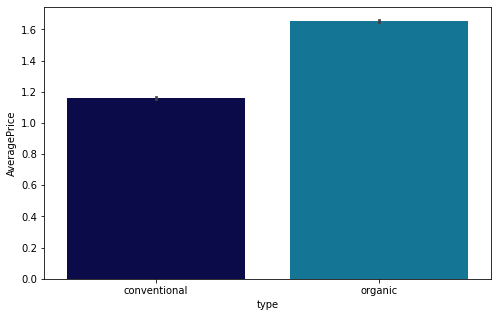

In [370]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='AveragePrice',data=df,palette='ocean')

Here we can see that the organic products are costlier than conventional product.. We know this well that any product which is organic is much costlier than the product with fertilizers

<AxesSubplot:xlabel='type', ylabel='Total Bags'>

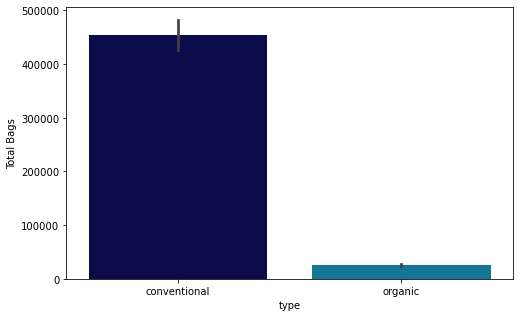

In [371]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='Total Bags',data=df,palette='ocean')

Here we can see that the coventional avocado is more purchased by the people because the reason organic product is costlier and are not easily available as compared to conventional product

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

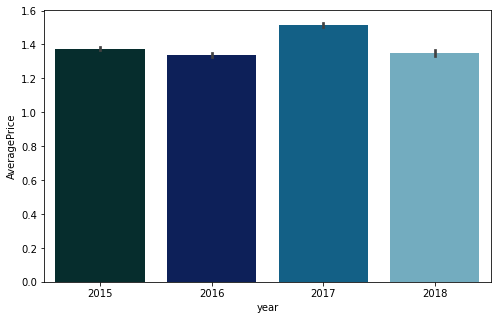

In [372]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='AveragePrice',data=df,palette='ocean')

The price of Avocado is maximum in 2017 and in 2015,2016 & 2018 are almost same..

<AxesSubplot:xlabel='year', ylabel='Total Bags'>

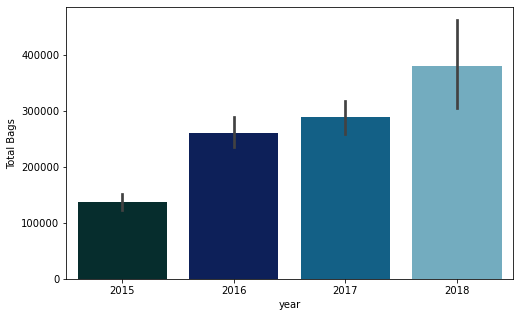

In [373]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Total Bags',data=df,palette='ocean')

In 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the Total bags sold

<AxesSubplot:xlabel='year', ylabel='Small Bags'>

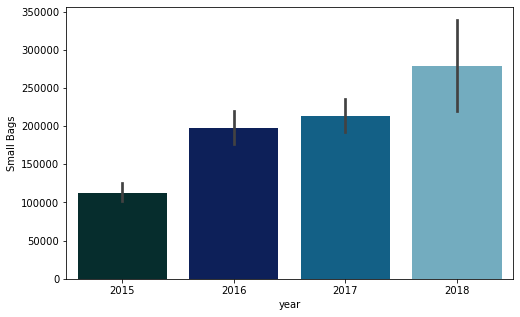

In [374]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Small Bags',data=df,palette='ocean')

In 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the Small bags sold

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

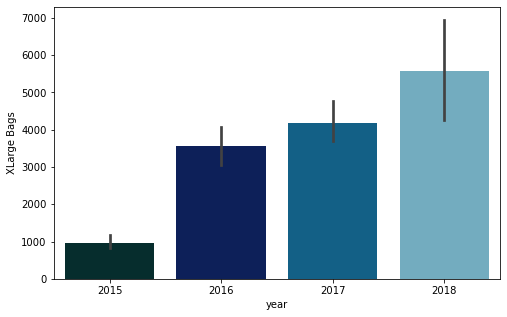

In [375]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='XLarge Bags',data=df,palette='ocean')

For Above 2 plots :- Its almost the same sales in all types of bags which is in 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the sales of Avocado

<AxesSubplot:xlabel='year', ylabel='Large Bags'>

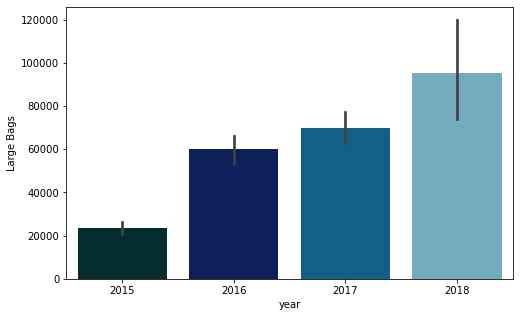

In [376]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Large Bags',data=df,palette='ocean')

In Feb(2) followed by june(6) is the highest sales month while considering total bags ..

<AxesSubplot:xlabel='Month', ylabel='Total Bags'>

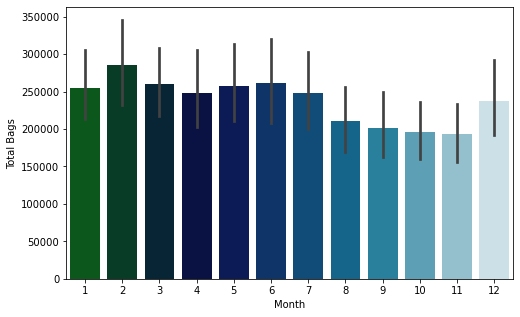

In [377]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='Total Bags',data=df,palette='ocean')

we can make a conclusion from this plot that from june(6) the price kept on increasing till November(11) ..

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

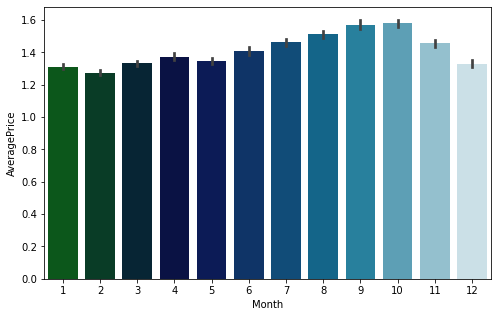

In [378]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='AveragePrice',data=df,palette='ocean')

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

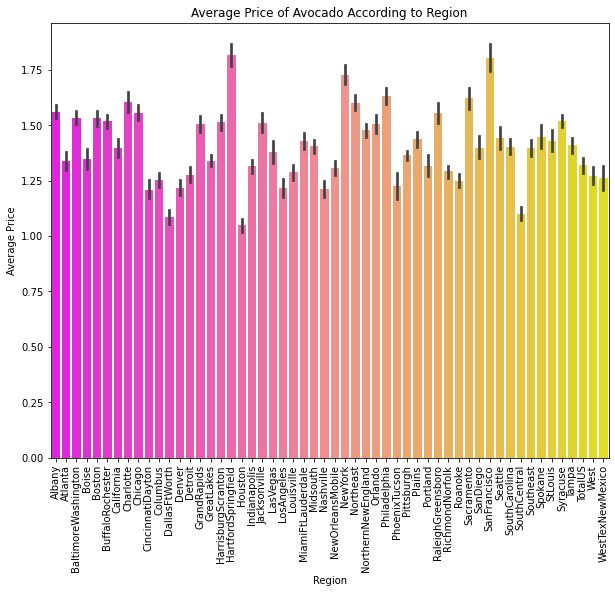

In [379]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='AveragePrice',data=df,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

### Observations : 
#### The regions where the prices of avacado was high :
harrisburgScranton ,HartfordSpringfield, SanFrancisco, NewYork, Philadelphia, Sacramento

Text(0.5, 1.0, 'Total Volume of Avocado in the region')

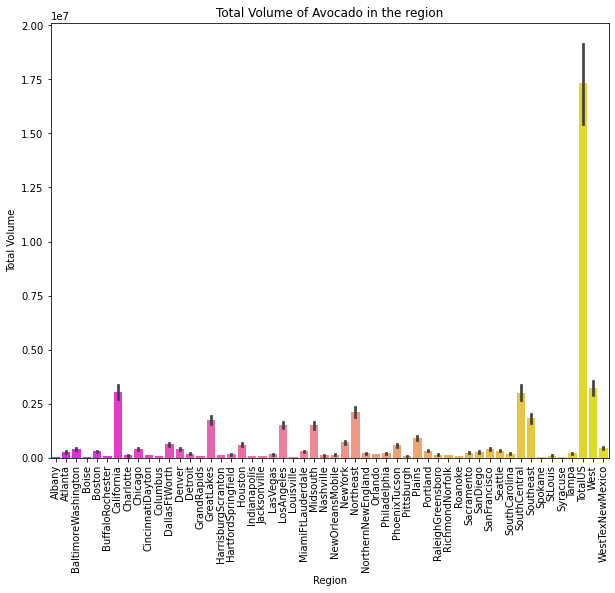

In [380]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='Total Volume',data=df,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado in the region')

Apart from TotalUS ,the maximum consumption that we see is in California,South Central,SouthEast,West,NorthEast and Great Lakes

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

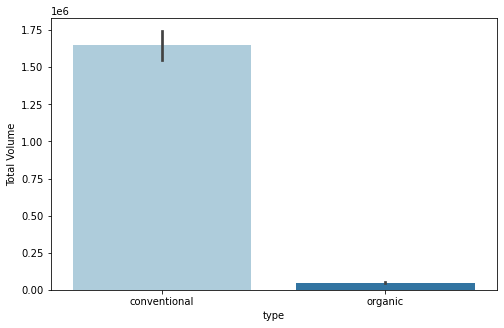

In [381]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='Total Volume',data=df,palette='Paired')

In total volume the max volumne comprises of coventional avocado and organic is very less

## C. Multi-Variate analysis:

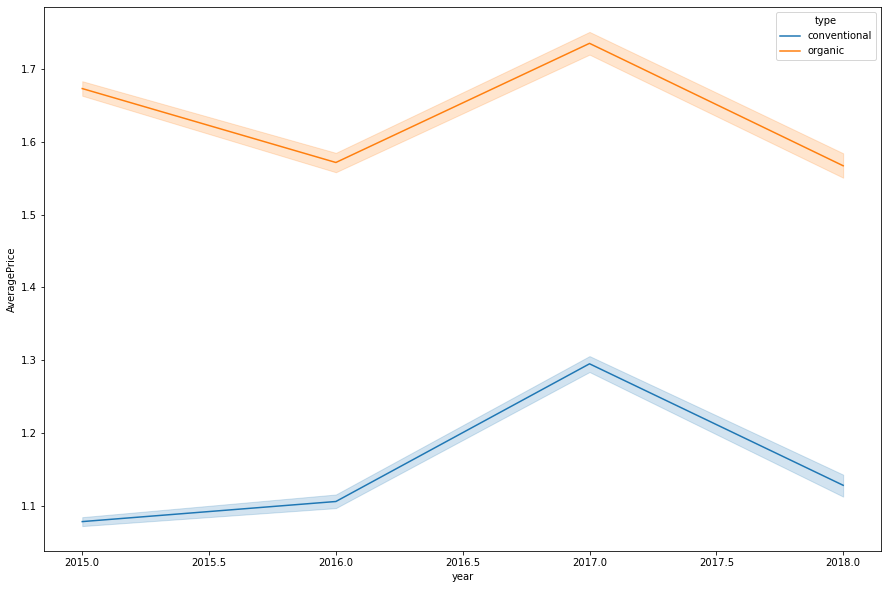

In [382]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

We can see that from 2016 to 2017 there is a postive growth or sales in both coventional and organic and in 2017 the sales is at a peak of both the types but here in coventional we can see that too that there is steady growth 2015 to 2016 also so we can say that conventional avocado growth is more than Organic ... Here the orange line is of Organic and we can see that its price is higher than conventional avocado¶

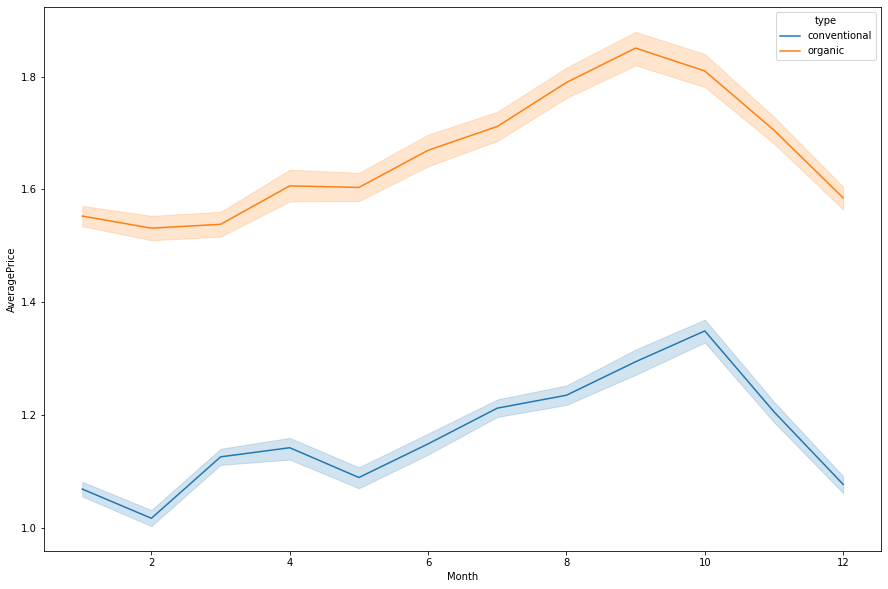

In [383]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()


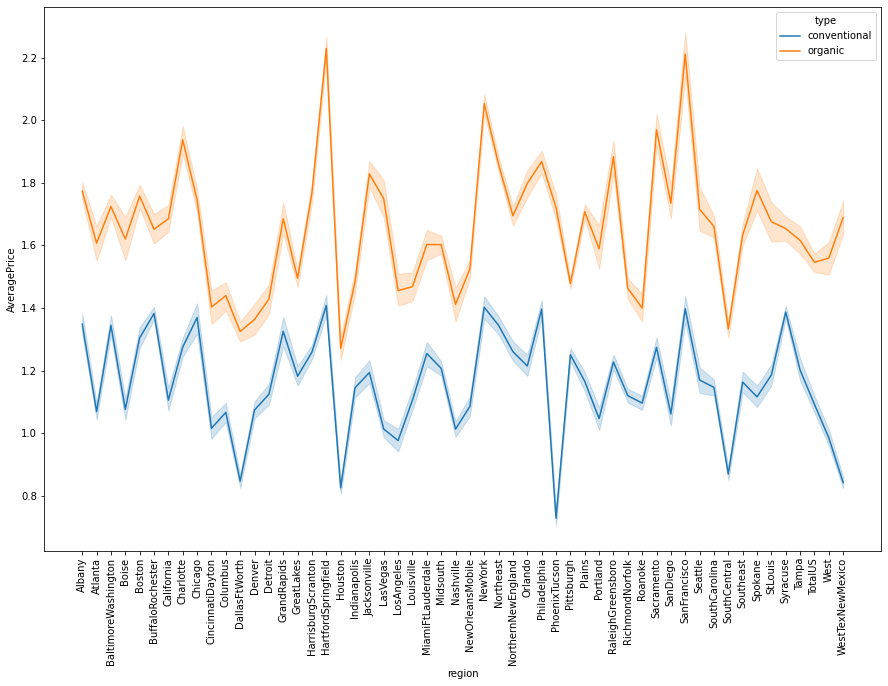

In [384]:
plt.figure(figsize=(15,10))
sns.lineplot(x="region", y="AveragePrice", hue='type', data=df)
plt.xticks(rotation=90)
plt.show()

#### The regions which are common for both Conventional and Organic and has the maximum price of the avacado are :  
harrisburgScranton, HartfordSpringfield, SanFrancisco, NewYork, Philadelphia, Sacramento

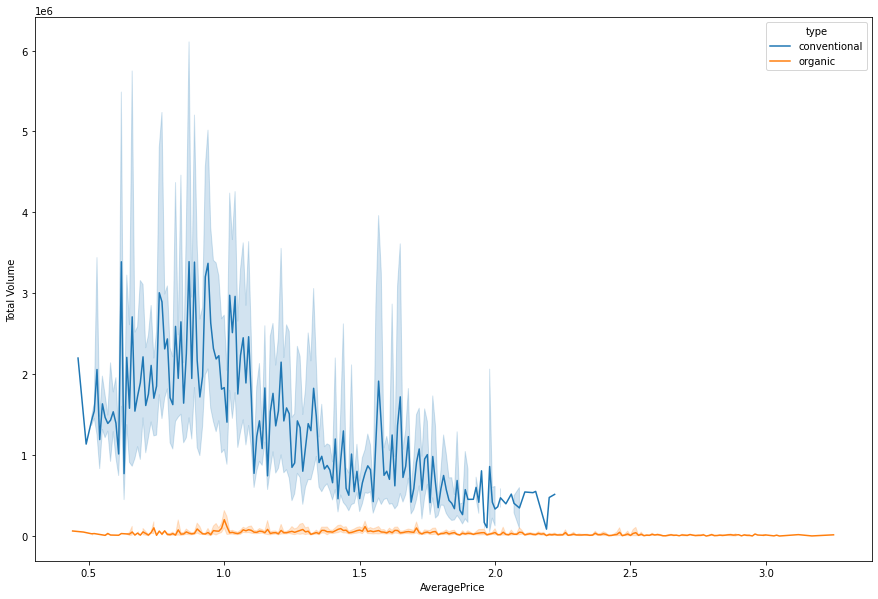

In [385]:
plt.figure(figsize=(15,10))
sns.lineplot(x="AveragePrice", y="Total Volume", hue='type', data=df)
plt.show()

Total volume of Conventional Acocado is more as compared to organic But the price of conventional avocado is less as compared to Organic

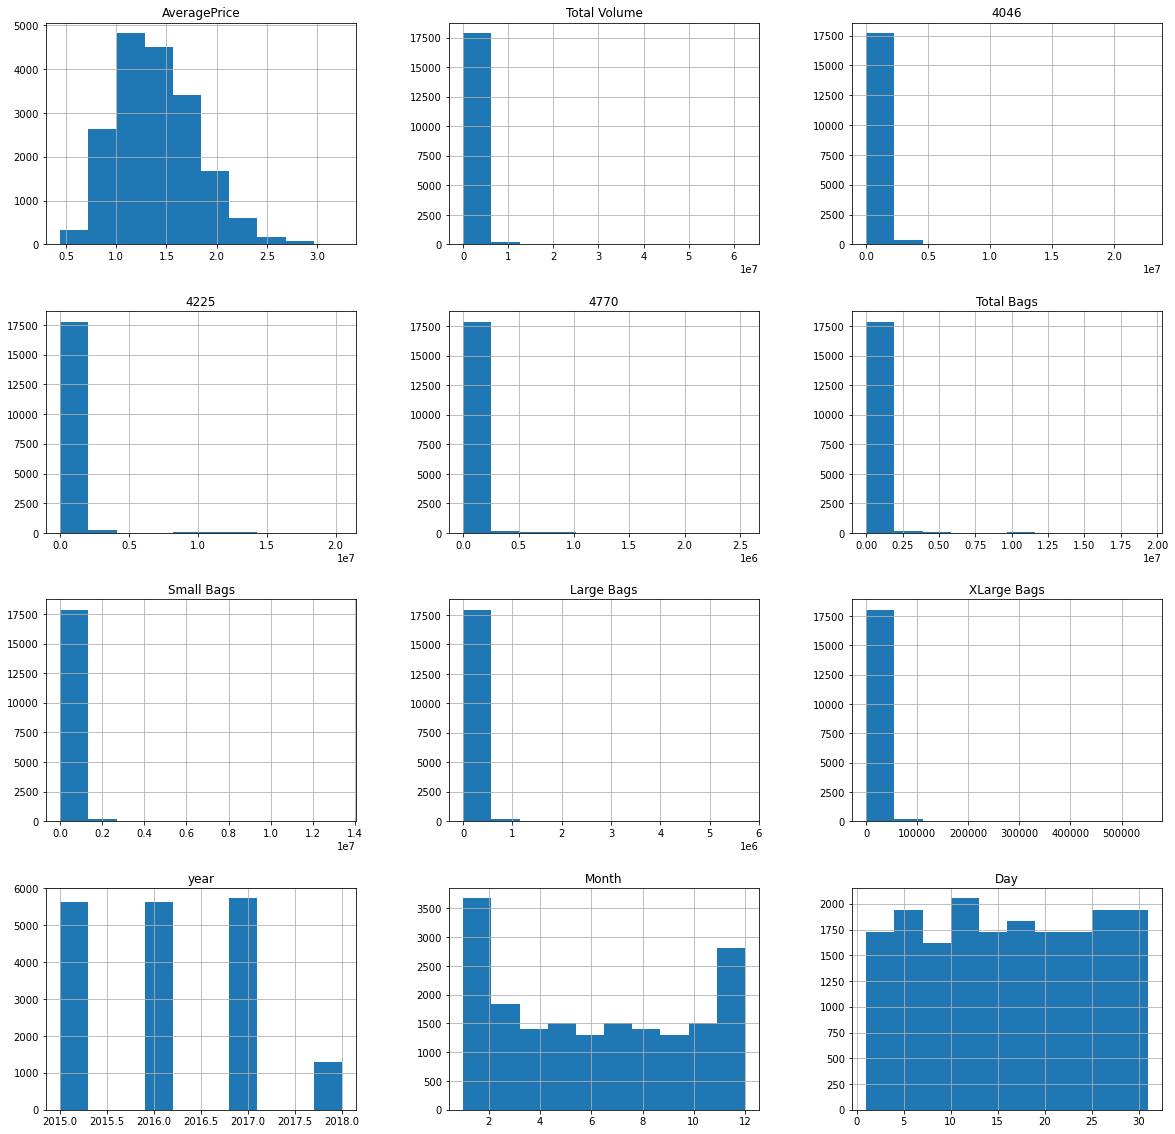

In [386]:
df.hist(bins=10, figsize=(20,20))
plt.show()

### Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags'
#### All the above mentioned columns have skewness we will correct it later

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

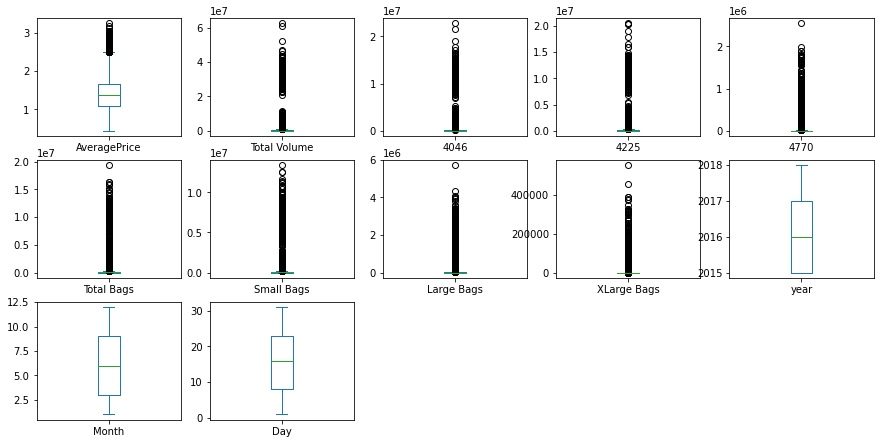

In [387]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

As we can see outliers are present in Averageprice and XLarge Bags column

## Correlation Of the data 

In [388]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [389]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
Day             0.027386
year            0.093197
Month           0.162409
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

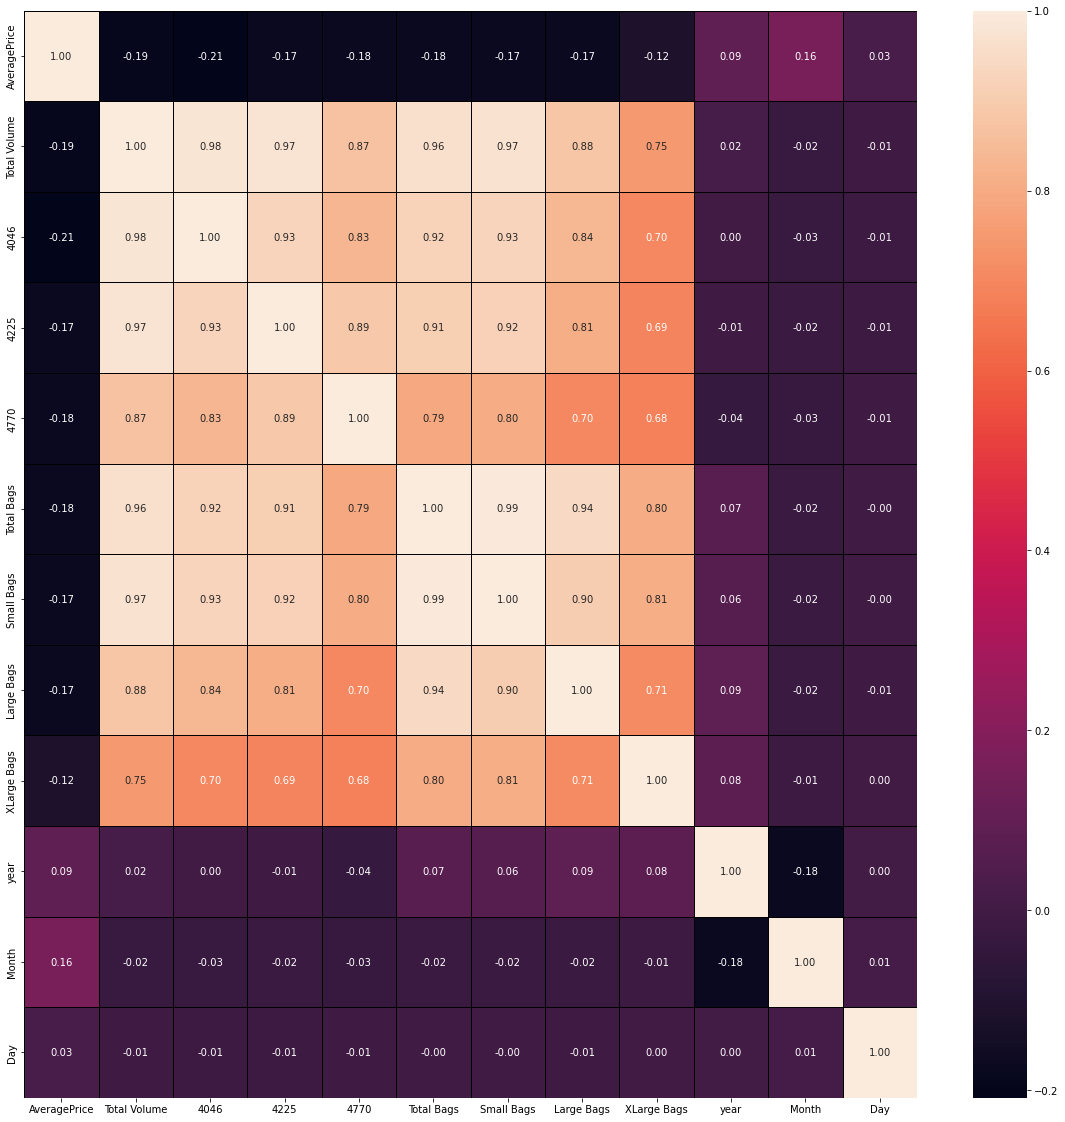

In [390]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')


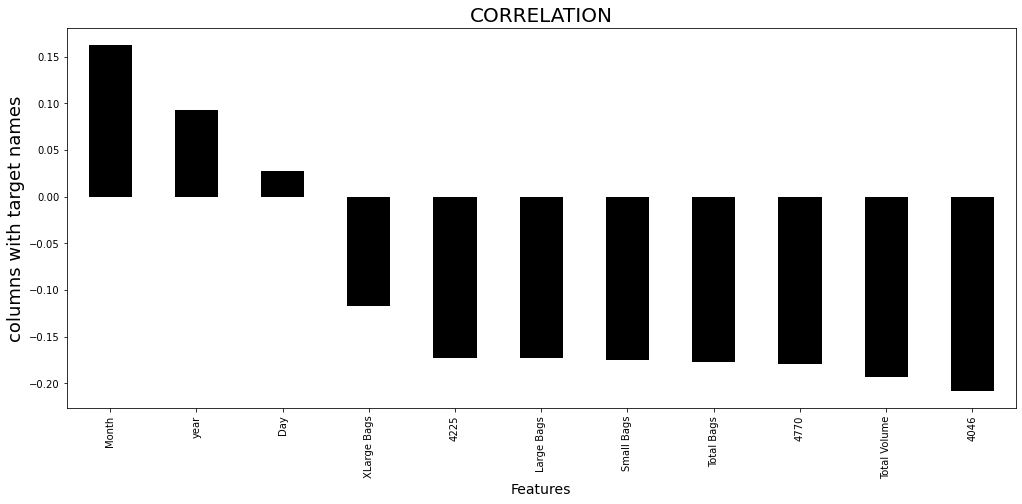

In [391]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

<AxesSubplot:>

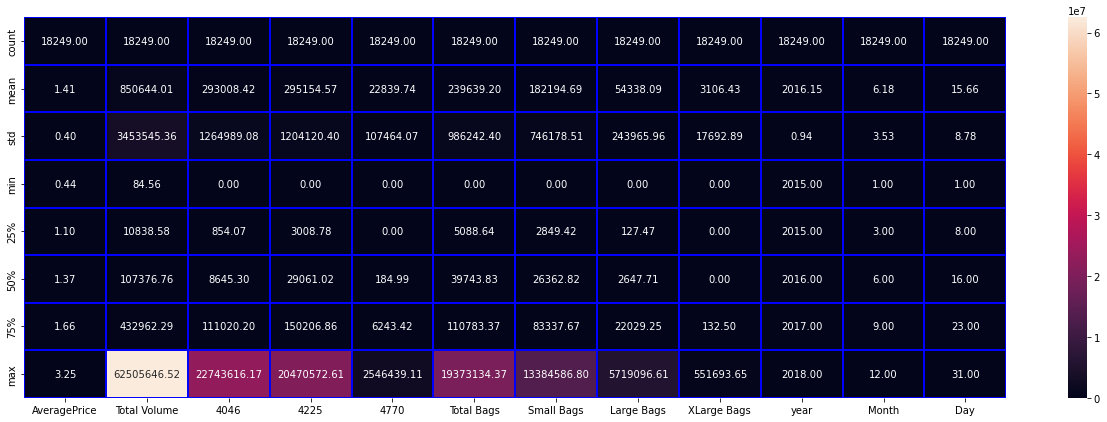

In [392]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

## Outliers Handeling 

#### Checking for outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

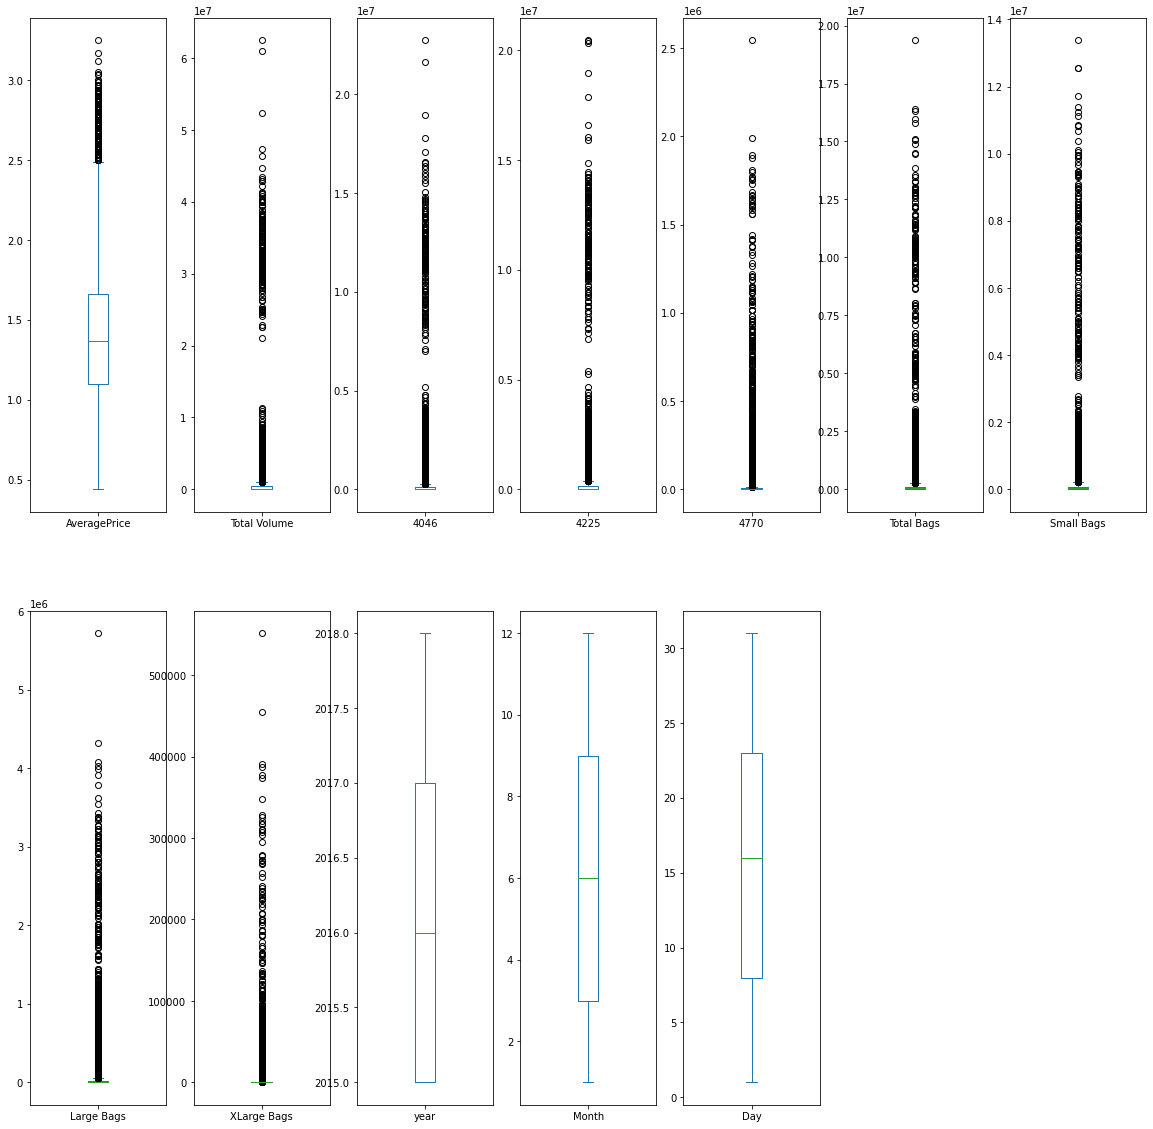

In [393]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,20))


#### We can see that Outliers are present in Average Price,Total Volumne ,4046 ,4225,4770,Total Bags ,Small Bags, large bags,xlarge bags 
#### WE NEED TO REMOVE THESE OUTLIERS

In [394]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
Day             0.027386
year            0.093197
Month           0.162409
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

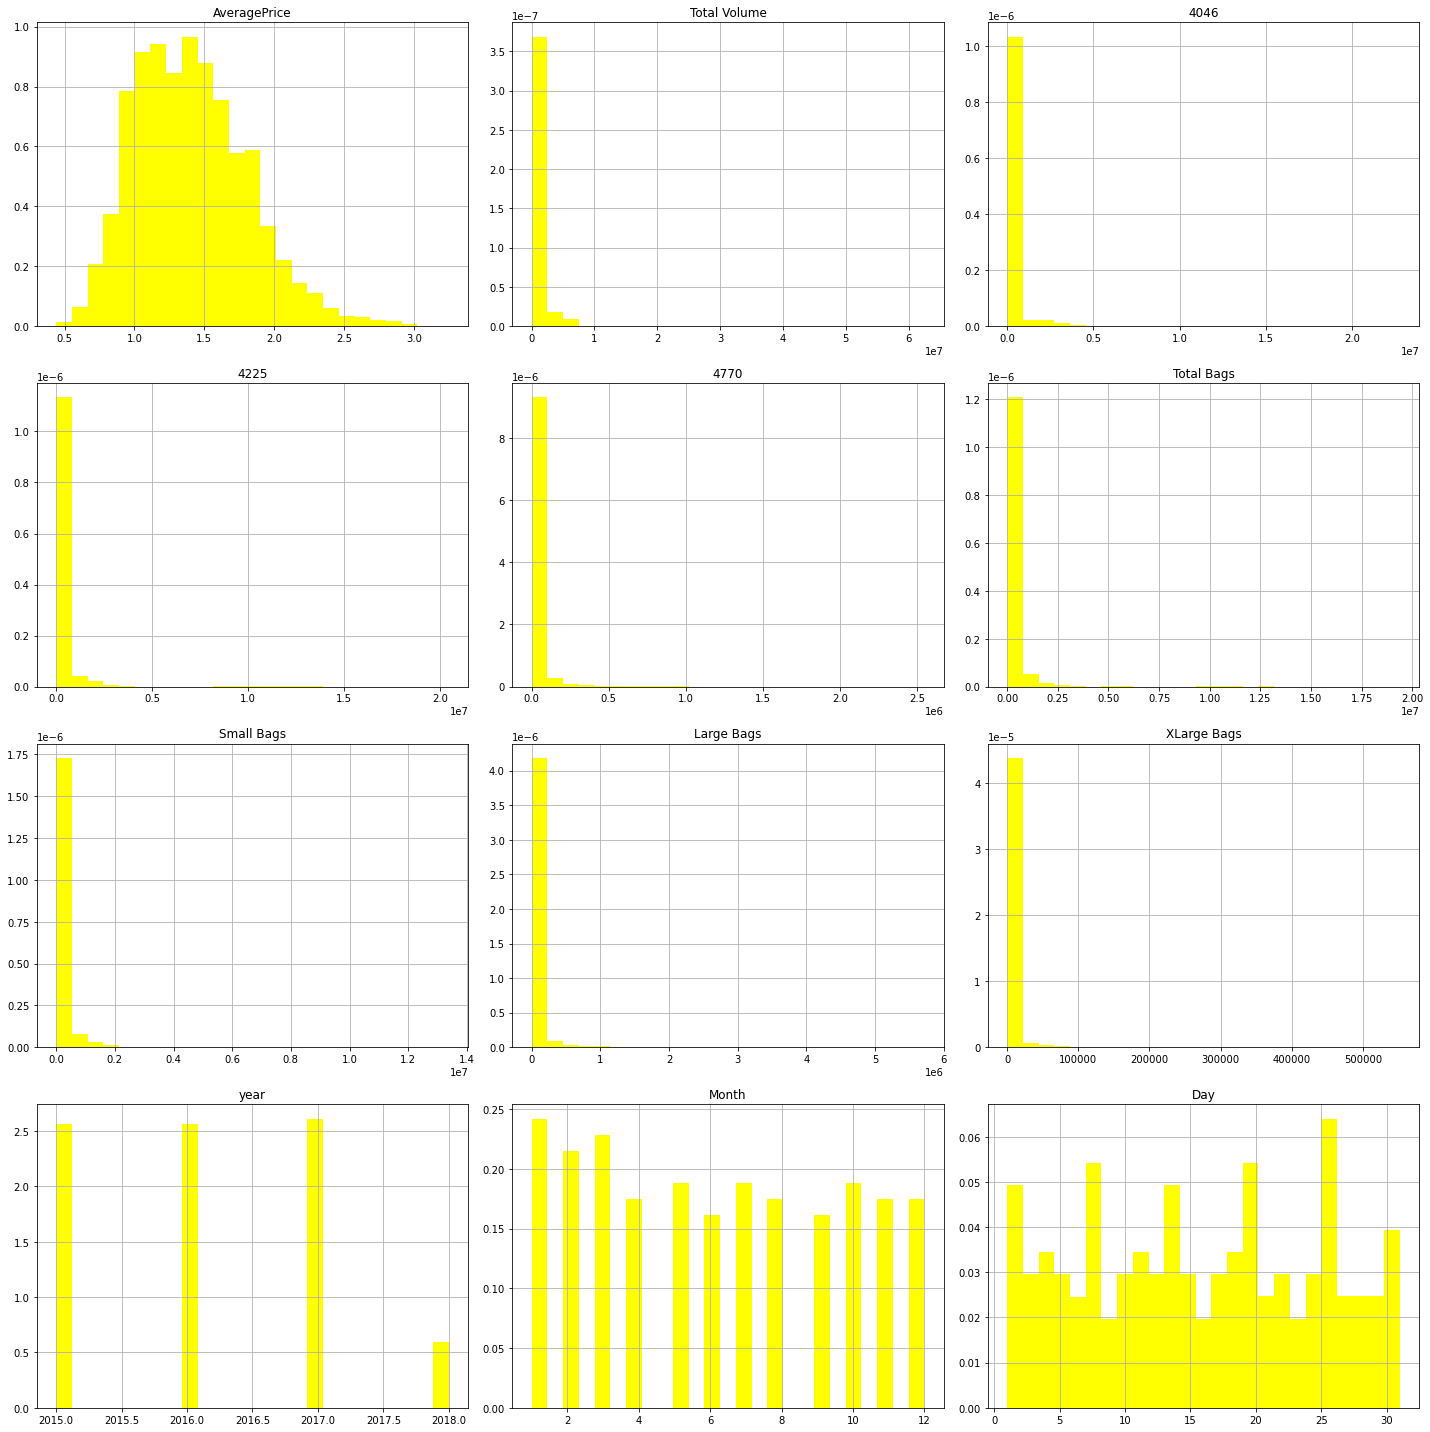

In [395]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [396]:
#Lets convert all catagorical columns to Int format
le = LabelEncoder()
Input = ['type','region']

for i in Input:
    df[i] = le.fit_transform(df[i])

## Removing and Treating Outliers

In [397]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [398]:
df_new=df[(z<3).all(axis=1)]

In [399]:
df_new.shape

(17651, 14)

In [400]:
# Percentage of data loss

DataLoss=((18249-17651)/18249)*100
DataLoss

3.276891884486821

### IQR (Inter Quantile Range) method

In [401]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [402]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (18249, 14)

New DataFrame data in Rows and Column: (11538, 14)

Total Dropped rows: 6711


In [403]:
#Percentage Data Loss using IQR
data_loss1 = (18249-11538)/18249*100
data_loss1

36.774617787276014

36.774617787276014% of data was removed while removing Outliers by IQR METHOD
Hence, it is not appropriate to consider IQR MEthod for removing Outlier and we will go by ZSCORE Method

## Now Treating of Skewness

In [404]:
# skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [405]:
# Columns having skewness 

L1=["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

In [406]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [407]:
#Removing skewness using yeo-johnson
df_new[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]] = PT.fit_transform(df_new[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]].values)

In [408]:
#Checking skewness after removing skewness by power transform
df_new.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

We can see that the skewness has been removed from the given columns "AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"..

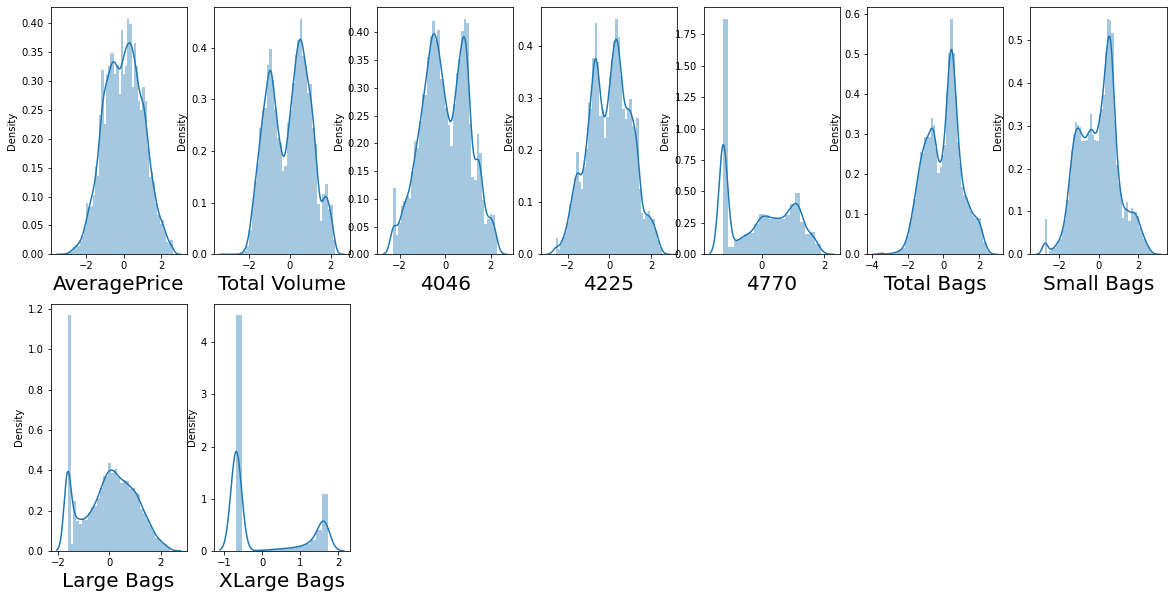

In [409]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,10))
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [410]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [411]:
#Independent Variable
y=df.iloc[:,0]

#Dependent Variable 
x=df.iloc[:,1:]

### Standard Scalar

In [412]:
scalar=StandardScaler()

x= pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252,1.647632,1.291857
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252,1.647632,0.494231
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252,1.647632,-0.303396
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252,1.647632,-1.101022
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,1.700811,-1.181997,-1.328915
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,1.700811,-1.464959,1.405803
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,1.700811,-1.464959,0.608177
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,1.700811,-1.464959,-0.189449


### CHECKING MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [413]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [414]:
vif_cal()

      VIF FACTOR      FEATURES
0   4.926465e+09  Total Volume
1   6.609602e+08          4046
2   5.988844e+08          4225
3   4.770265e+06          4770
4   2.370316e+14    Total Bags
5   1.364727e+14    Small Bags
6   1.450435e+13    Large Bags
7   7.622368e+10   XLarge Bags
8   1.061752e+00          type
9   1.084444e+00          year
10  1.069500e+00        region
11  1.037268e+00         Month
12  1.000900e+00           Day


We can see that Multicollinearity is not present in the dataset

In [415]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.43679101988654156
At random state 0,the testing accuracy is :- 0.44757184183142584



At random state 1,the training accuracy is :- 0.43816597802999124
At random state 1,the testing accuracy is :- 0.4427366125930138



At random state 2,the training accuracy is :- 0.4431058894658454
At random state 2,the testing accuracy is :- 0.4223976244251625



At random state 3,the training accuracy is :- 0.4398672783099721
At random state 3,the testing accuracy is :- 0.43574120126057714



At random state 4,the training accuracy is :- 0.4423619715664845
At random state 4,the testing accuracy is :- 0.42574917332534434



At random state 5,the training accuracy is :- 0.43863163721394605
At random state 5,the testing accuracy is :- 0.4398316164971595



At random state 6,the training accuracy is :- 0.43794598984429567
At random state 6,the testing accuracy is :- 0.44346679817787504



At random state 7,the training accuracy is :- 0.43964772037185995
At

At random state 62,the training accuracy is :- 0.43678457835056816
At random state 62,the testing accuracy is :- 0.4481824242287168



At random state 63,the training accuracy is :- 0.4380555988761894
At random state 63,the testing accuracy is :- 0.4429197333244711



At random state 64,the training accuracy is :- 0.44107077261397976
At random state 64,the testing accuracy is :- 0.43056119685939387



At random state 65,the training accuracy is :- 0.4418402530309886
At random state 65,the testing accuracy is :- 0.42681320295636616



At random state 66,the training accuracy is :- 0.43560334886708896
At random state 66,the testing accuracy is :- 0.4534066522247393



At random state 67,the training accuracy is :- 0.4388681363026389
At random state 67,the testing accuracy is :- 0.43990477055502275



At random state 68,the training accuracy is :- 0.4395147063882615
At random state 68,the testing accuracy is :- 0.4371485128248278



At random state 69,the training accuracy is :- 0.4371470

In [416]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

In [417]:
lr.fit(x_train,y_train)

LinearRegression()

In [418]:
pred_test=lr.predict(x_test)

In [419]:
print (r2_score(y_test,pred_test))

0.44104448017161


In [420]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.23194380729797726
Mean Squared Error :-> 0.09082409069814772
Root Mean Squared Error :-> 0.3013703547101933


In [421]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,16):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -5416.936796080828 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 3 the cv score is -13.250639449050682 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 4 the cv score is -12.353807081812095 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 5 the cv score is -10.886791534904487 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 6 the cv score is -1.0152112868094532 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 7 the cv score is 0.027062684197267015 and accuracy score for training is -0.4563010302827686 and accuracy for testing is 0.44104448017161



At cross fold 8 the cv score is -0.04088229544477849 and accuracy scor

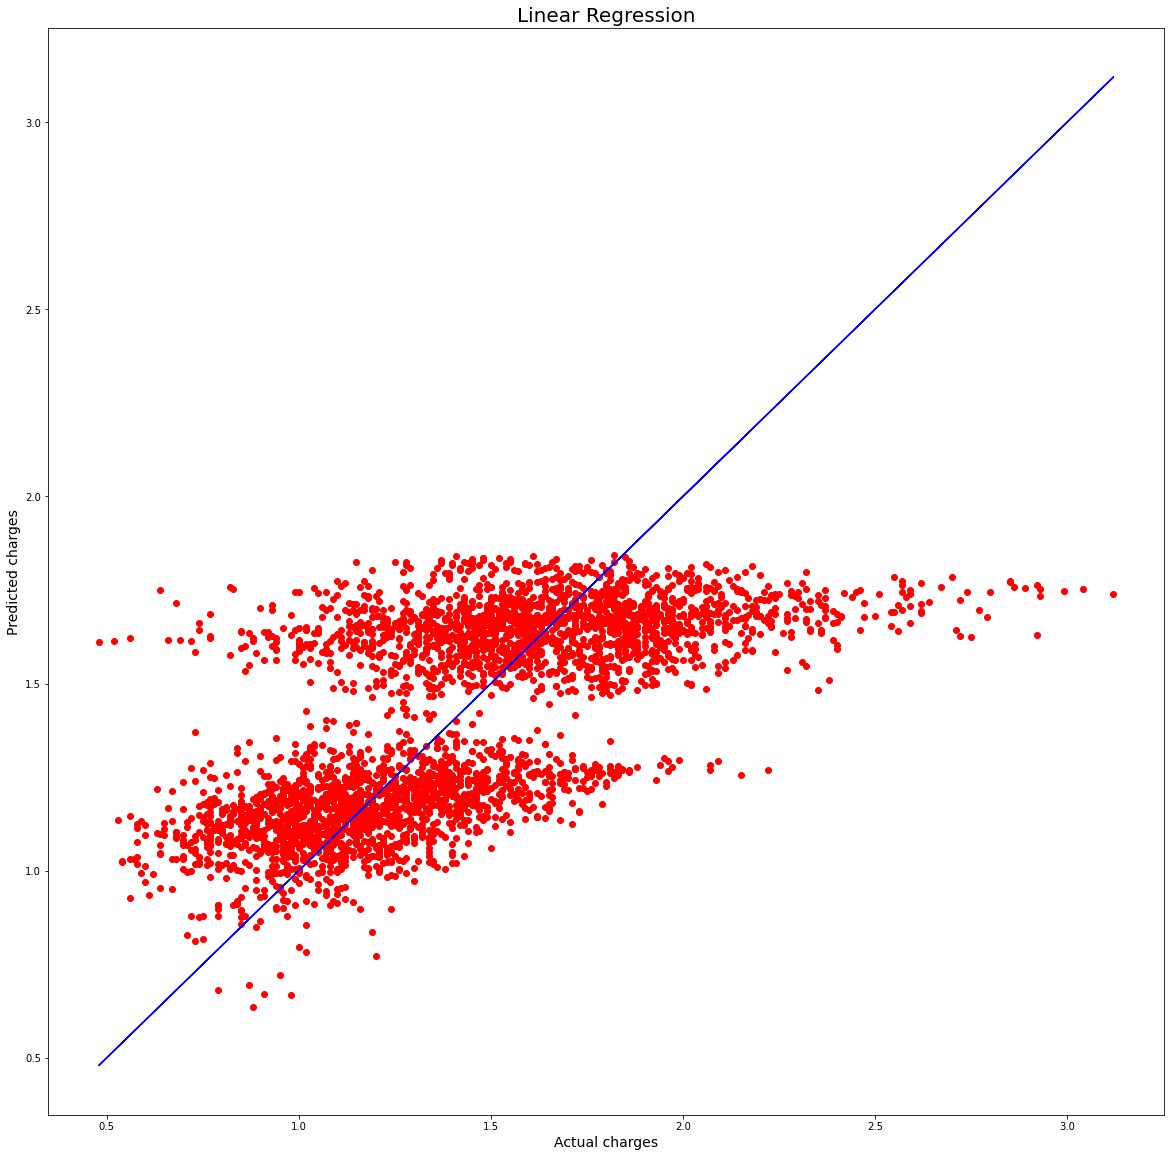

In [422]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

# Lets Train with Another Regressor Model

## DecisionTreeRegressor

In [423]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [424]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 1.0
At random state 0,the testing accuracy is :- 0.7562985072232595



At random state 1,the training accuracy is :- 1.0
At random state 1,the testing accuracy is :- 0.7753320779374884



At random state 2,the training accuracy is :- 1.0
At random state 2,the testing accuracy is :- 0.7570449154750823



At random state 3,the training accuracy is :- 1.0
At random state 3,the testing accuracy is :- 0.7761464425765006



At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 0.7535079809818077



At random state 5,the training accuracy is :- 1.0
At random state 5,the testing accuracy is :- 0.7388984218478044



At random state 6,the training accuracy is :- 1.0
At random state 6,the testing accuracy is :- 0.7817473483711119



At random state 7,the training accuracy is :- 1.0
At random state 7,the testing accuracy is :- 0.7566364873671187



At random state 8,the training accuracy is :- 1.0
At random stat

At random state 70,the training accuracy is :- 1.0
At random state 70,the testing accuracy is :- 0.7535307570433148



At random state 71,the training accuracy is :- 1.0
At random state 71,the testing accuracy is :- 0.742374267802498



At random state 72,the training accuracy is :- 1.0
At random state 72,the testing accuracy is :- 0.7642116896961617



At random state 73,the training accuracy is :- 1.0
At random state 73,the testing accuracy is :- 0.7680385194517891



At random state 74,the training accuracy is :- 1.0
At random state 74,the testing accuracy is :- 0.7675398669813717



At random state 75,the training accuracy is :- 1.0
At random state 75,the testing accuracy is :- 0.7573126307546307



At random state 76,the training accuracy is :- 1.0
At random state 76,the testing accuracy is :- 0.7672172561731411



At random state 77,the training accuracy is :- 1.0
At random state 77,the testing accuracy is :- 0.768711422784712



At random state 78,the training accuracy is :- 1.0

#### We are taking random state 3

In [425]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [426]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [427]:
pred_test=dt.predict(x_test)

In [428]:
print (r2_score(y_test,pred_test))

0.771411935445739


In [429]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,16):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -2.553592668198459 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 3 the cv score is -0.4201874932518889 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 4 the cv score is -0.5448655103235829 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 5 the cv score is -0.2971939873102153 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 6 the cv score is -0.3279593313089347 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 7 the cv score is -0.13440423869145507 and accuracy score for training is -1.0219529460238994 and accuracy for testing is 0.771411935445739



At cross fold 8 the cv score is -0.2795327385212336 and accuracy

### The cross validation is not considerable in case of Decision Tree Regressor bcz it is in negative

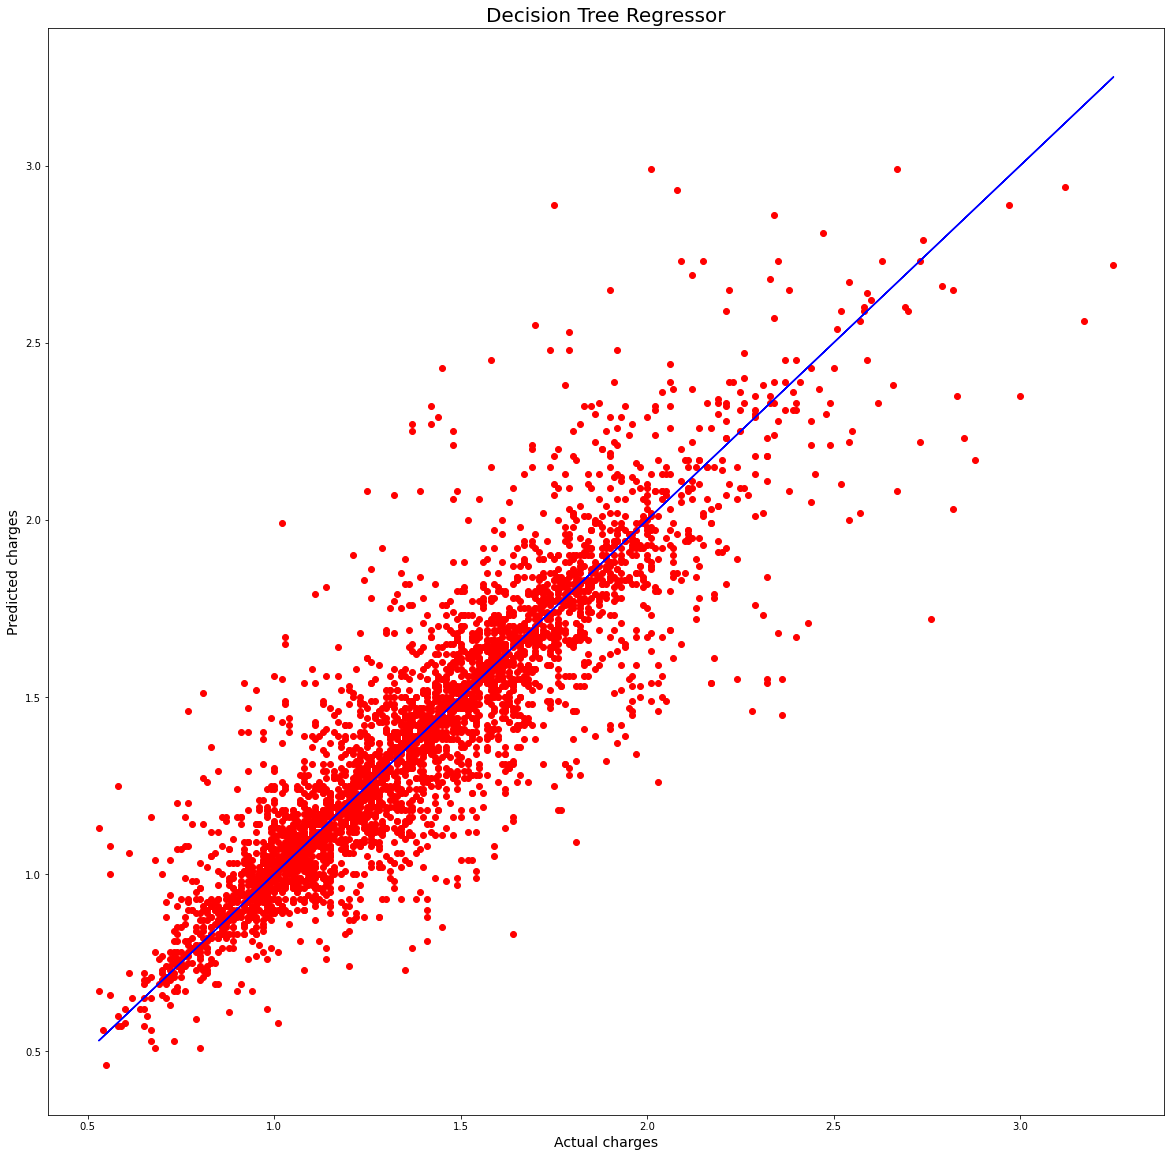

In [430]:

plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regressor' , fontsize=20)
plt. show()

## Now Lets take KNeighborsRegressor

In [431]:
knn=KNeighborsRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.6878109230048057
At random state 0,the testing accuracy is :- 0.5220740527023529



At random state 1,the training accuracy is :- 0.6874239554098109
At random state 1,the testing accuracy is :- 0.5263738570880132



At random state 2,the training accuracy is :- 0.6873879910103438
At random state 2,the testing accuracy is :- 0.5049849677574277



At random state 3,the training accuracy is :- 0.6869905203149516
At random state 3,the testing accuracy is :- 0.5091765324351929



At random state 4,the training accuracy is :- 0.6843175001794712
At random state 4,the testing accuracy is :- 0.5230582690077701



At random state 5,the training accuracy is :- 0.6901646954813673
At random state 5,the testing accuracy is :- 0.5187701390027876



At random state 6,the training accuracy is :- 0.6874478370059602
At random state 6,the testing accuracy is :- 0.5247650388137743



At random state 7,the training accuracy is :- 0.6838491908446418
At random s

At random state 62,the training accuracy is :- 0.6839627397972303
At random state 62,the testing accuracy is :- 0.537198590390898



At random state 63,the training accuracy is :- 0.6836996855306255
At random state 63,the testing accuracy is :- 0.5356403042396092



At random state 64,the training accuracy is :- 0.6854467294332778
At random state 64,the testing accuracy is :- 0.5149521557875324



At random state 65,the training accuracy is :- 0.6903381544930292
At random state 65,the testing accuracy is :- 0.508130073177272



At random state 66,the training accuracy is :- 0.6825472847264669
At random state 66,the testing accuracy is :- 0.5425513318851605



At random state 67,the training accuracy is :- 0.6846231749793559
At random state 67,the testing accuracy is :- 0.5299863664267814



At random state 68,the training accuracy is :- 0.683700670827062
At random state 68,the testing accuracy is :- 0.5223632350667484



At random state 69,the training accuracy is :- 0.6771450368652194

#### We are taking 51 as a random state bcz here the difference between training and testing is not much

In [432]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)


In [433]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [434]:
pred_test=knn.predict(x_test)

In [435]:
print (r2_score(y_test,pred_test))

0.5408334206513068


In [436]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.19487506849315064
Mean Squared Error :-> 0.07414621917808219
Root Mean Squared Error :-> 0.2722980337389203


## CV of KNeighborsRegressor

In [437]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -2.1597775014442 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 3 the cv score is -0.8620377470560782 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 4 the cv score is -0.44611803735071986 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 5 the cv score is -0.0459419555154984 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 6 the cv score is -0.22382637933367985 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 7 the cv score is -0.08797518867434127 and accuracy score for training is -0.6540522572665015 and accuracy for testing is 0.5408334206513068



At cross fold 8 the cv score is -0.13854692783522066 and a

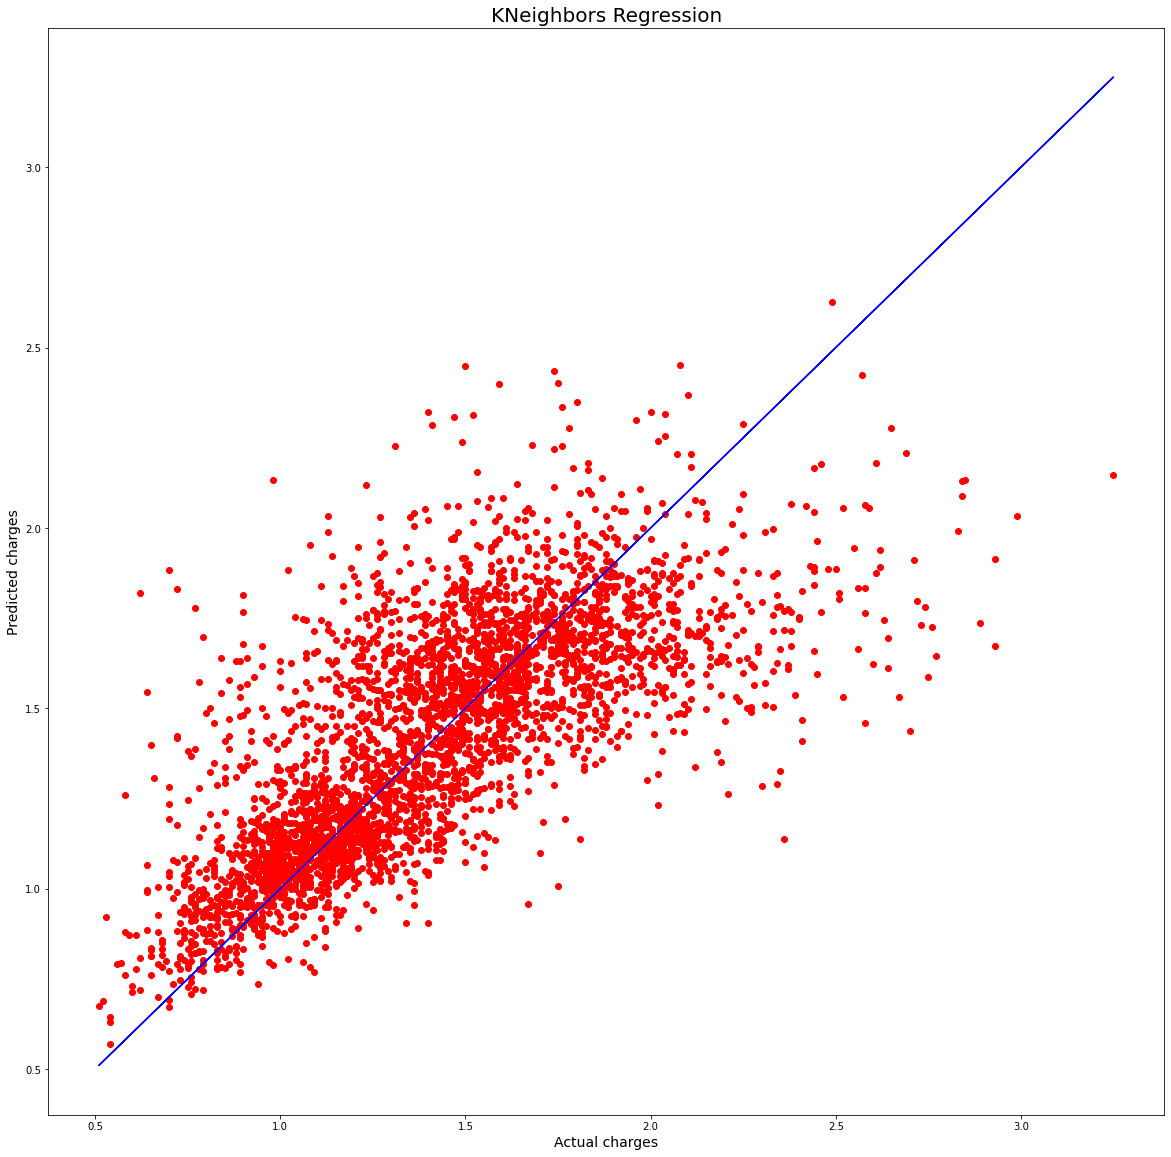

In [438]:
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('KNeighbors Regression' , fontsize=20)
plt. show()

WE can see that the data's are scattered on the best fit line and it works much better than Linear Regression but the best till now is DTR

##  Lets Use some Ensemble Technique

In [439]:
# Bagging Technique (Parallel)
rf=RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9846787841800955
At random state 0,the testing accuracy is :- 0.8867626924925711



At random state 1,the training accuracy is :- 0.9842904024177925
At random state 1,the testing accuracy is :- 0.8956643444298968



At random state 2,the training accuracy is :- 0.9851113651989153
At random state 2,the testing accuracy is :- 0.8867886338787727



At random state 3,the training accuracy is :- 0.9847107397522046
At random state 3,the testing accuracy is :- 0.8940837769552107



At random state 4,the training accuracy is :- 0.984934186947449
At random state 4,the testing accuracy is :- 0.8825101398015802



At random state 5,the training accuracy is :- 0.9847030053007265
At random state 5,the testing accuracy is :- 0.8884761604913323



At random state 6,the training accuracy is :- 0.9844252167757273
At random state 6,the testing accuracy is :- 0.8985766065837811



At random state 7,the training accuracy is :- 0.984549711751825
At random sta

At random state 62,the training accuracy is :- 0.9847538832884849
At random state 62,the testing accuracy is :- 0.8971123133539572



At random state 63,the training accuracy is :- 0.9845703655047525
At random state 63,the testing accuracy is :- 0.8893995428532767



At random state 64,the training accuracy is :- 0.984858173025553
At random state 64,the testing accuracy is :- 0.8887537334960961



At random state 65,the training accuracy is :- 0.9849559596965539
At random state 65,the testing accuracy is :- 0.880806502131181



At random state 66,the training accuracy is :- 0.9847923493510541
At random state 66,the testing accuracy is :- 0.892985606825374



At random state 67,the training accuracy is :- 0.9841431136790759
At random state 67,the testing accuracy is :- 0.8836361839631804



At random state 68,the training accuracy is :- 0.9849240827473432
At random state 68,the testing accuracy is :- 0.8961991320299221



At random state 69,the training accuracy is :- 0.9843072195691533

In [440]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [441]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [442]:
pred_test=rf.predict(x_test)

In [443]:
print (r2_score(y_test,pred_test))

0.9016285417481771


90% is r2 in random forest which very good and the best from the rest model

In [444]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.0917537808219178
Mean Squared Error :-> 0.016698683920547942
Root Mean Squared Error :-> 0.1292233876685948


In [445]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -1.5236614647185123 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 3 the cv score is -0.05813476669599982 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 4 the cv score is 0.060459117050175204 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 5 the cv score is 0.21268651751660742 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 6 the cv score is 0.1062870468725164 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 7 the cv score is 0.2869291890041126 and accuracy score for training is -0.9411040384796296 and accuracy for testing is 0.9016285417481771



At cross fold 8 the cv score is 0.28038261071329884 and ac

#### The cross validation is not considerable in case of Random forest Regressor bcz it is very less. % of cv score id the max over here

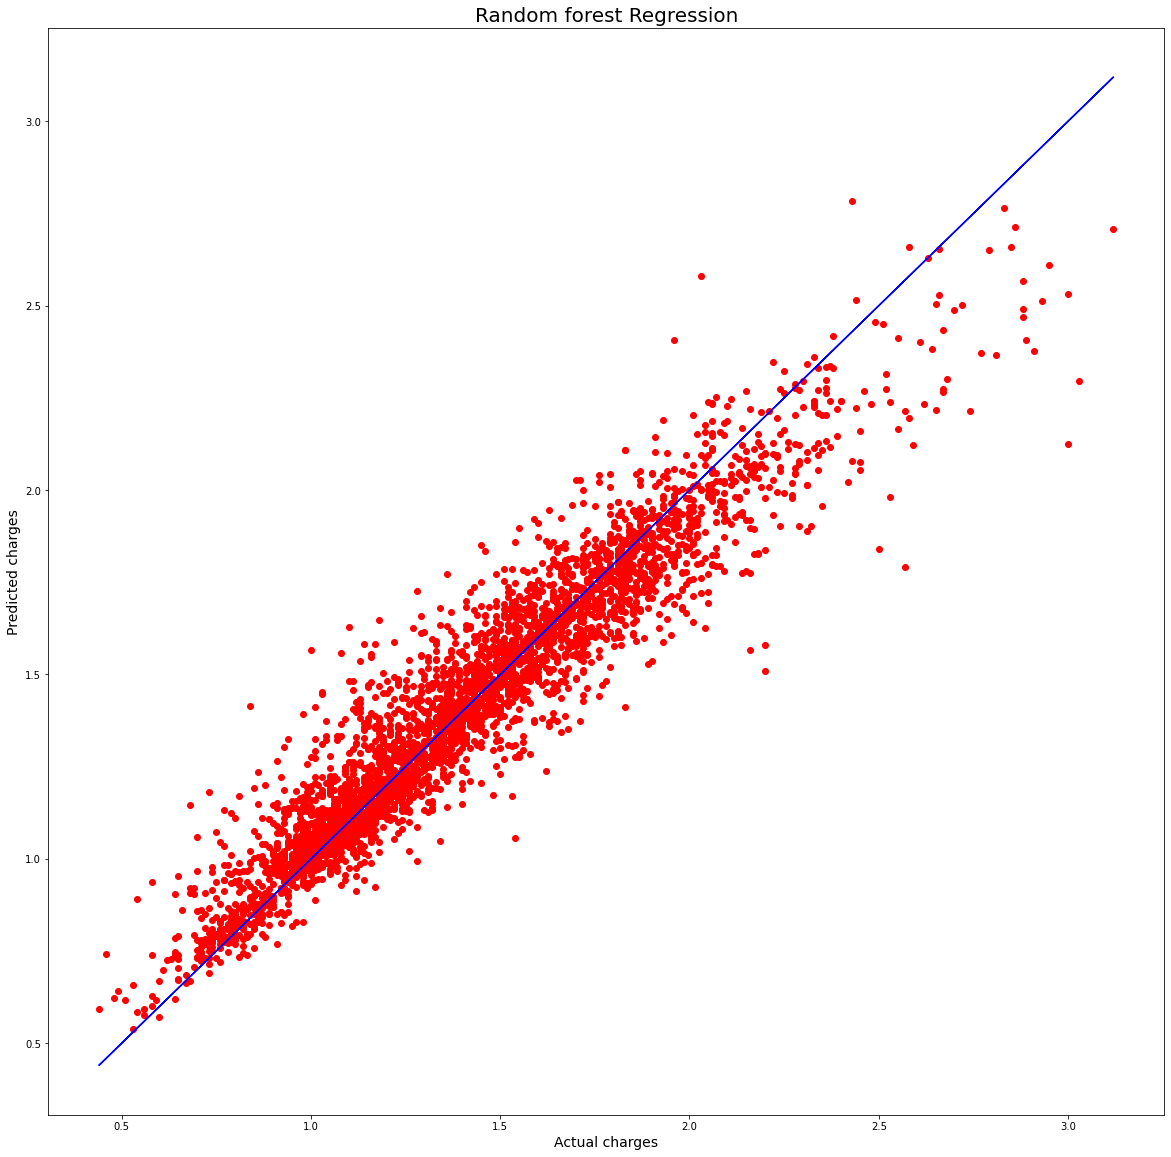

In [446]:
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random forest Regression' , fontsize=20)
plt. show()

#### We can see that the Random forest regressor is Acting as the best regressor till now,we can see that maximum of the data are falling on the best fit line

## Reguralization Technique

In [447]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [448]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

43.59527245591431

In [449]:
pred_ls=ls.predict(x_test)

In [450]:
lss=r2_score(y_test,pred_ls)
lss*100

44.99408774277357

In [451]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

6.543774127689754

## Ridge

In [452]:
from sklearn.linear_model import Ridge

parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
xx=GridSearchCV(rd,parameters)
xx.fit(x_train,y_train)
print(xx.best_params_)

{'alpha': 0.001, 'solver': 'sag'}


In [453]:
rd=Ridge(alpha=10,solver='sag')
rd.fit(x_train,y_train)
rd_score_training = rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rd_score_training*100

43.595504143489215

In [454]:
pred_rd=rd.predict(x_test)

In [455]:
rdd=r2_score(y_test,pred_rd)
rdd*100

44.995876585456394

In [456]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

6.535172364378594

## Now Lets check which Model should we go for as a final model

In [457]:
mm=pd.DataFrame([["Linear Regression","44%"],["Decision Tree Regressor","77%"],["KNeighbors Regressor","54%"],["Random Forest Regressor","90%"],["Lasso","44%"],["Ridge","44%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,Linear Regression,44%
1,Decision Tree Regressor,77%
2,KNeighbors Regressor,54%
3,Random Forest Regressor,90%
4,Lasso,44%
5,Ridge,44%


#### We will take random forest as a Final model bcz it is performing the best

## Hyper Parameter Tuning

In [ ]:
rf.get_params()

In [ ]:
parameter={'criterion' :['mse','mae'],
          'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)


print (clf.best_params_)

In [ ]:

rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print ('R2 Score :',rfs*100)



In [459]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Avocadostudy.pkl")

['Avocadostudy.pkl']

# Prediction

In [460]:
#Loading the saved model
aa=joblib.load("Avocadostudy.pkl")


In [461]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([1.6979, 1.7014, 1.8674, ..., 1.6375, 1.3373, 1.796 ])

In [462]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0       1       2       3       4       5       6       7     \
Predicted  1.6979  1.7014  1.8674  1.8689  0.7444  1.9247  1.0146  0.7943   
Original   1.4100  1.7300  1.8200  1.9000  0.7100  1.6600  1.1100  0.8100   

             8       9       10      11      12     13      14      15    \
Predicted  1.2304  1.1171  1.7443  1.4606  1.3844  1.274  1.7017  1.4781   
Original   1.2600  1.0300  1.7400  1.6400  1.3300  1.230  1.8300  1.3200   

             16      17     18      19      20      21      22      23    \
Predicted  0.7835  1.8169  1.098  1.4069  1.3709  1.1089  1.1619  1.3229   
Original   0.7200  1.7500  1.170  1.4400  1.6300  1.1700  1.1800  1.3300   

             24      25      26      27      28      29      30      31    \
Predicted  1.2048  1.3288  1.3305  1.0314  1.3056  0.9752  1.5679  0.9968   
Original   1.1800  1.2300  1.3300  1.1000  1.3400  1.1200  1.4500  0.8700   

             32      33      34      35      36      37     38      39    \
Predicted  1.6675  1.7098  1.9325  0.7955  1.5316  1.4357  1.315  1.4233   
Original   1.9900  1.6400  1.8200  0.8400  1.5500  1.4600  1.270  1.3200   

             40      41      42      43      44      45      46      47    \
Predicted  1.6448  0.7804  1.1737  1.0888  1.1398  1.1495  1.8864  1.5826   
Original   1.6300  0.7600  1.0900  1.1100  1.1800  0.8600  2.0400  1.5000   

             48      49      50      51      52      53      54      55    \
Predicted  1.5293  1.3875  1.0048  0.9223  1.6807  0.9721  1.2771  1.2306   
Original   1.8900  1.4100  0.9600  0.9900  1.5800  0.9500  1.5500  1.5000   

             56     57      58      59      60      61      62      63    \
Predicted  1.1627  1.707  1.7928  1.1312  1.1201  0.9676  1.0978  1.0551   
Original   1.1600  1.650  1.9100  1.1000  1.1700  0.8300  1.0700  0.9600   

             64      65     66      67      68      69      70      71    \
Predicted  1.8335  0.9296  1.703  1.7858  1.3743  1.1031  1.0083  1.0972   
Original   1.8400  0.8100  1.680  1.8300  1.0400  1.0800  0.9500  1.0000   

             72      73      74      75      76      77      78      79    \
Predicted  1.2725  0.9653  1.7263  1.0288  2.2264  1.0375  1.3923  1.9752   
Original   1.3000  0.8800  1.6400  0.9600  2.3000  0.9500  1.4700  1.9300   

             80      81      82      83      84      85     86      87    \
Predicted  1.4376  1.2388  1.4848  1.3397  1.8007  1.4464  1.193  1.3196   
Original   1.5400  1.2000  1.4100  1.3100  2.0200  1.3700  1.050  1.4900   

             88      89      90     91      92     93      94     95     96    \
Predicted  1.3112  1.0534  1.4979  1.285  1.3288  2.229  1.4348  1.677  1.183   
Original   1.3500  1.1100  1.5300  1.290  1.3400  2.100  1.4500  1.750  0.960   

             97      98      99      100     101     102     103     104   \
Predicted  1.8268  1.4169  1.0518  1.9055  1.0076  1.2646  2.5046  1.9322   
Original   1.9500  1.4000  1.0100  2.0000  0.8700  1.3400  2.6500  1.8100   

             105     106     107     108     109     110     111    112   \
Predicted  1.4392  1.8785  1.2975  1.6313  1.4669  1.6598  1.5878  1.599   
Original   1.1700  1.7200  1.2300  1.6100  1.5300  1.6900  1.9300  1.440   

            113     114     115     116     117    118     119     120   \
Predicted  1.727  0.8766  1.8324  1.8541  1.5708  0.807  1.0831  1.2621   
Original   1.830  0.8800  1.8900  2.0100  1.4600  0.790  1.1000  1.2500   

             121     122     123     124     125     126     127     128   \
Predicted  1.1322  0.9925  1.3923  1.7272  0.9114  1.8456  1.4155  1.3245   
Original   1.0500  1.0000  1.3600  1.7300  0.9300  1.6600  1.3200  1.3700   

             129     130     131     132     133     134     135     136   \
Predicted  0.9868  0.8301  1.0014  0.9749  0.8878  0.8696  1.4352  1.3076   
Original   1.1300  0.9800  0.8500  0.9200  1.0100  0.9000  1.4500  1.5400   

             137     138     139     140     141     142     143     144   \
Predict

### It is making a good Prediction and the difference between Original and Predicted is not much
## This Project is completed here for Regression Side
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Classification 

#### We have already done with Eveything to process the data Now Lets split the x and y according to classification type

In [463]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0,2015,0,12,27
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0,2015,0,12,20
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0,2015,0,12,13
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0,2015,0,12,6
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0,2015,0,11,29


In [464]:
x=df.loc [:,df.columns != 'type']

In [465]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [466]:
y=df.loc[:,'type']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int32

## Balancing the dataset over here,otherwise it will be a baised dataset

In [469]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=917)

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
pred_train=lr.predict(x_train)

In [ ]:
pred_test=lr.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_test))

# CROSS VALIDATION (for LOGISTIC REGRESSION)

In [ ]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [ ]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

In [ ]:
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

We can see that Our area under RoC curve is =94% Very good, Because the more the area is under the curve more the accuracy will be.


## Lets Try Multiple Classification model

In [473]:
from sklearn.metrics import confusion_matrix

In [474]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('accuracy of training model :-',accuracy_score(y_train,model_1_pred_train))
    print ('accuracy of test data :-',accuracy_score(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_train,model_1_pred_train))
    print ('confusion matrix : \n',confusion_matrix(y_test,model_1_pred_test))

In [ ]:
# Logistics regression score
model_selection(lr,x_train,y_train,x_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

model_selection(dt,x_train,y_train,x_test,y_test)

### Decision Tree is performing good 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

model_selection(kn,x_train,y_train,x_test,y_test)

### KNeighbors classifier is also performing good but the best one till now is DTC

In [ ]:
from sklearn.svm import SVC
sv=SVC()

model_selection(sv,x_train,y_train,x_test,y_test)

## SVC is not performing as good as DTC and KNN
##  Hyper Parameter Tuning

In [ ]:
mm=pd.DataFrame([["Logistic Regression","94%"],["Decision Tree Classifier","100%"],["KNeighbors Classifier","98%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

# We will take decision tree as a final model

In [476]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [477]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],'random_state':list(range(0,100))
}

In [ ]:
xx=GridSearchCV(dt,params)
xx.fit(x_train,y_train)
print(xx.best_params_)

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=5,random_state=86)
dt.fit(x_train,y_train)
dt_score_training = dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
dt_score_training*100

# Now save the Final model

In [ ]:
#Saving the model using .pkl
import joblib
joblib.dump(dt,"Avo_Classifi.pkl")

# Prediciton

In [ ]:
#Loading the saved model
aa=joblib.load("Avo_Classifi.pkl")


In [ ]:
#Prediction
prediction = aa.predict(x_test)
prediction

In [ ]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])